In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

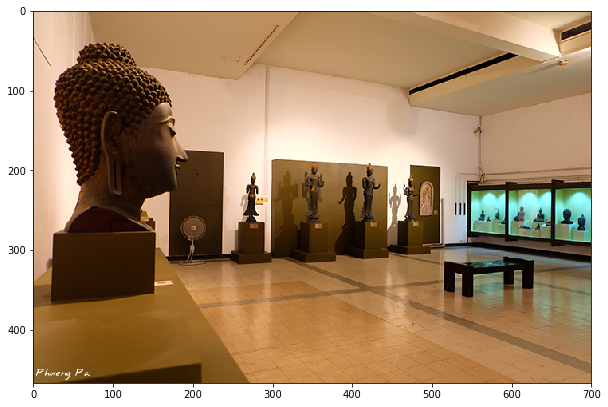

In [2]:
img = cv2.imread("img/19.jpg")
#แปลงภาพเป็นสี RGB สำหรับ matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#แสดงภาพด้วย matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

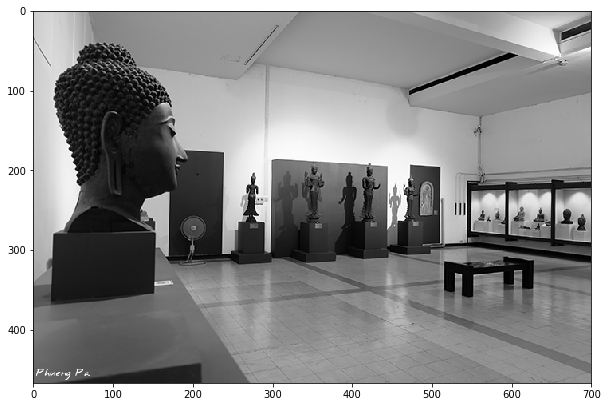

In [4]:
#แปลงรูปภาพเป็น grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# have to convert grayscale back to RGB for plt.imshow()
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))
plt.show()

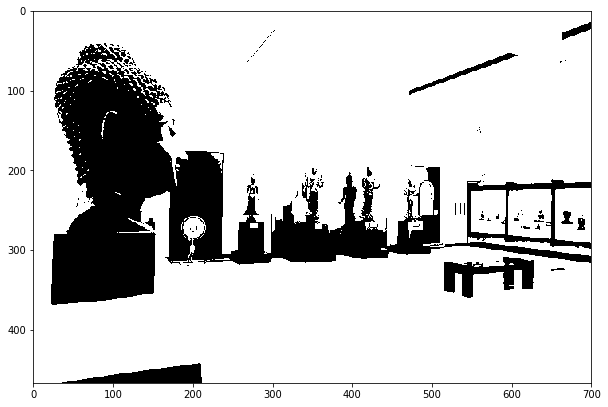

In [98]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)
plt.show()

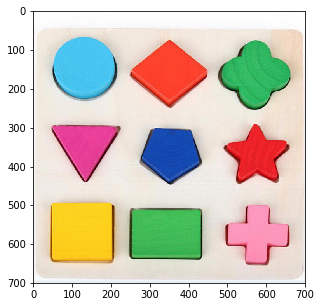

In [193]:
# open new Mondrian Piet painting photo
piet = cv2.imread("img/22.jpg")
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))
plt.show()

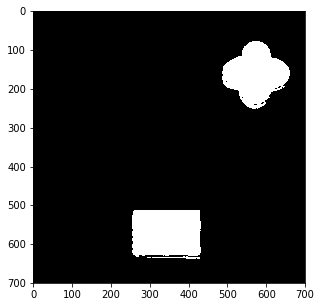

In [194]:
# threshold for hue channel in green range
pink_min = np.array([135, 70, 70], np.uint8)
pink_max = np.array([173, 255, 255], np.uint8)

green_min = np.array([60, 135, 60], np.uint8)
green_max = np.array([80, 255, 225], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, green_min, green_max)

# show threshold bits 
blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(5,5))
plt.imshow(blue_img)
plt.show()


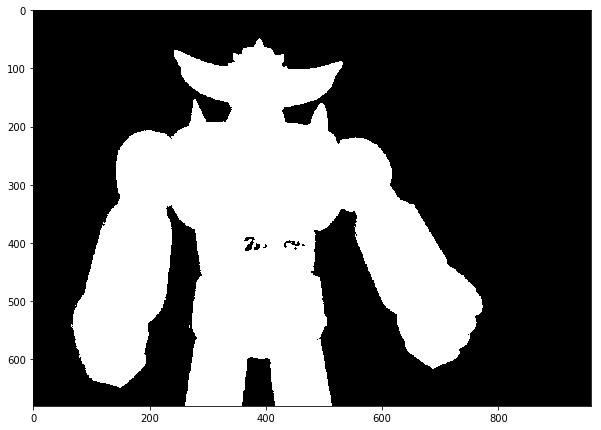

In [188]:
#Using binary thresholding to obtain an image mask
upstate = cv2.imread("img/23.jpg")
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
green_min = np.array([60, 135, 60], np.uint8)
green_max = np.array([80, 255, 225], np.uint8)
mask_inverse = cv2.inRange(upstate_hsv, green_min, green_max)
mask = cv2.bitwise_not(mask_inverse)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
plt.show()

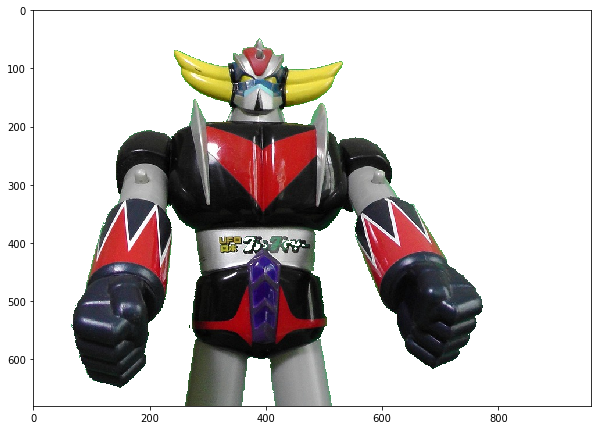

In [189]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1,cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
plt.show()

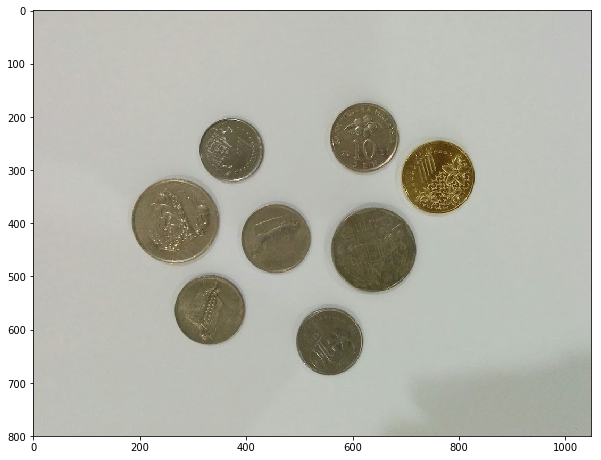

In [232]:
#Contour and bounding boxes 
coins = cv2.imread("img/21.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
plt.show()
#cv2.imwrite('coins-orig.jpg', coins)

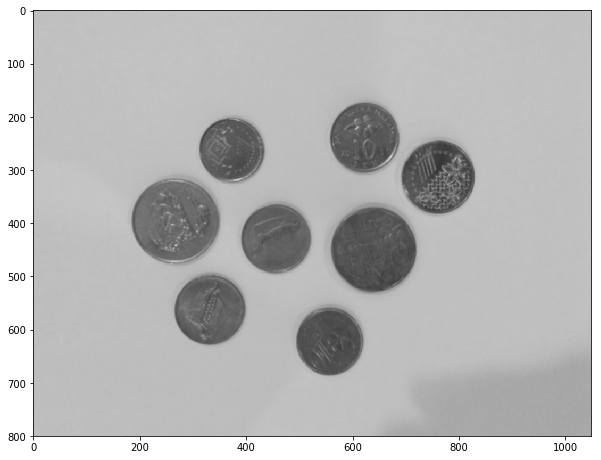

In [233]:
# get binary image and apply Gaussian blur รับภาพไบนารีและใช้เบลอ Gaussian
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))
plt.show()

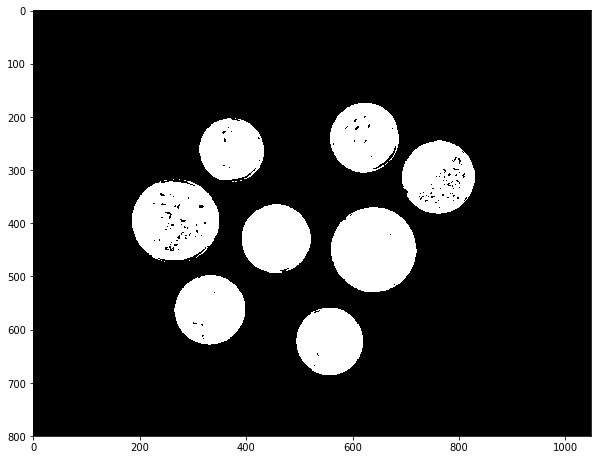

In [234]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins กลับภาพเพื่อรับเหรียญ
coins_binary = cv2.bitwise_not(coins_binary)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))
plt.show()
#cv2.imwrite('coins-binary.png', coins_binary)

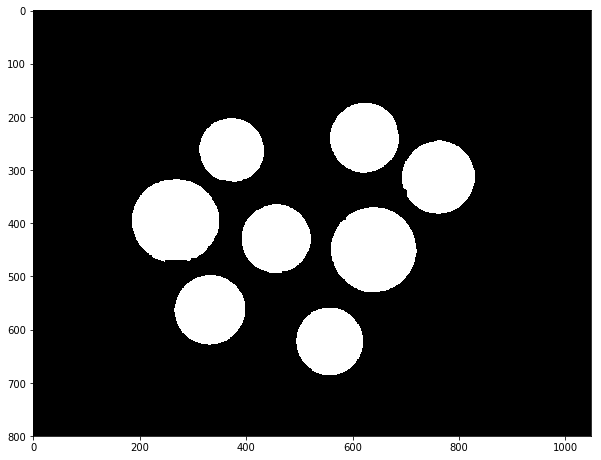

In [235]:
# morph coins by eroding and dilating to remove noise เหรียญโดยการกัดกร่อนและขยายเพื่อขจัดเสียงรบกวน
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))
plt.show()

number of coins: 8


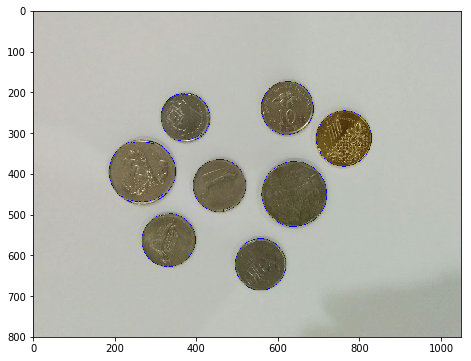

In [236]:
# find contours
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# make copy of image
coins_and_contours = np.copy(coins)
# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]
# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))
# print number of contours
print('number of coins: %d' % len(large_contours))
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
plt.show()

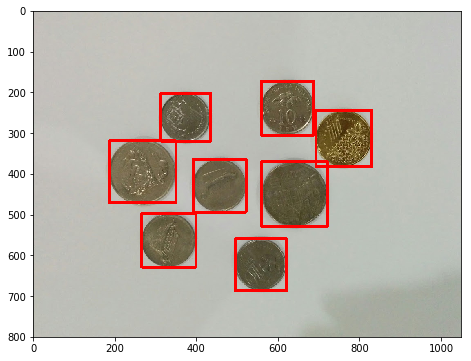

In [238]:
#Find bounding boxes
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 0, 255), 5)

plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
plt.show()

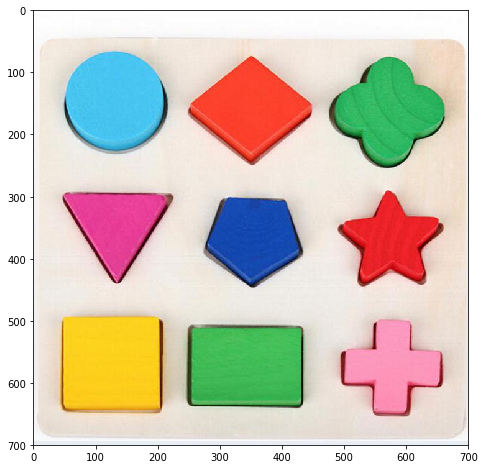

In [227]:
#Edge detection
cups = cv2.imread("img/22.jpg")
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(cups, cv2.COLOR_BGR2RGB))
plt.show()

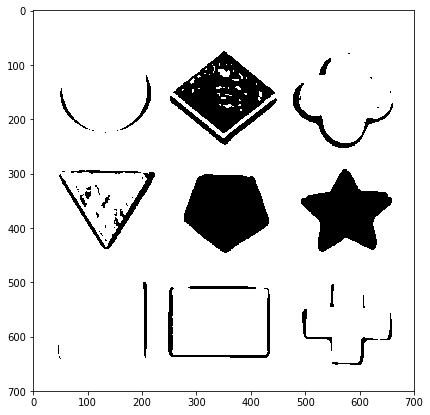

In [169]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,7))
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
plt.show()

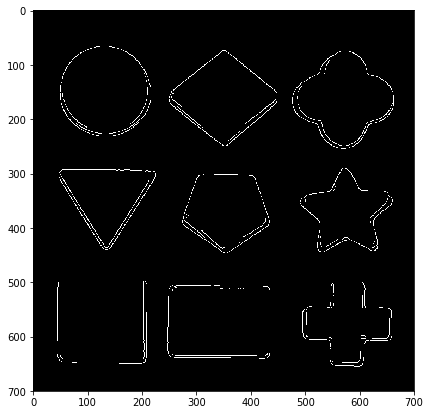

In [170]:
_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.figure(figsize=(10,7))
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
plt.show()

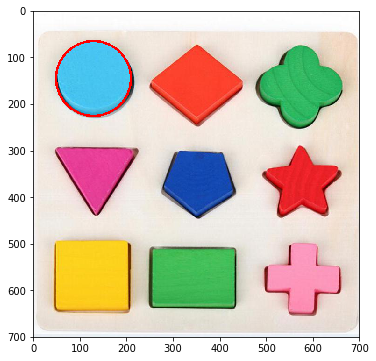

number of circles detected: 1


In [231]:
#Hough Transform
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)
# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (0, 0, 255), 4)
    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
    plt.show()
print('number of circles detected: %d' % len(circles[0]))

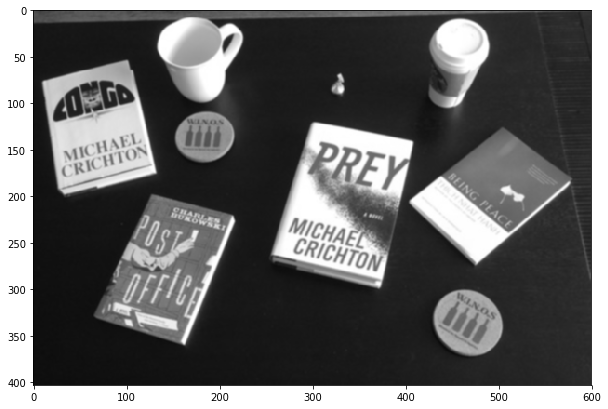

In [17]:
# import the necessary packages
import numpy as np
from cv2 import *
from matplotlib import pyplot as plt


image = cv2.imread("img/example.jpg")
#ทำภาพให้เป็นสีเทา
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#ทำการเบลอภาพ 3*3
gray = cv2.GaussianBlur(gray, (3, 3), 0)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.show()

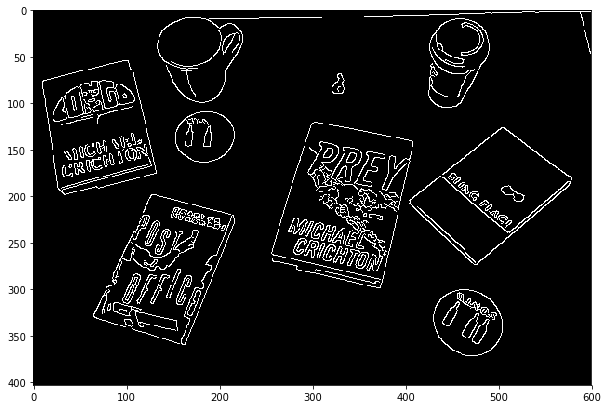

In [18]:
# ทำการหาเส้นขอบภาพ
edged = cv2.Canny(gray, 10, 250)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB))
plt.show()

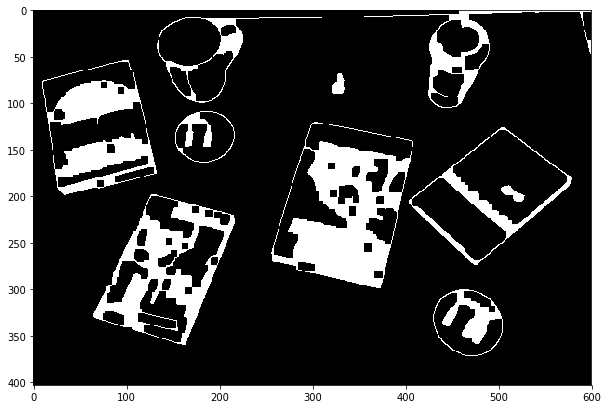

In [11]:
# การกัดกร่อนและขยายเพื่อขจัดเสียงรบกวน
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
#การลบ Noises ของภาพออกไป
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_GRAY2RGB))
plt.show()

I found 4 books in that image


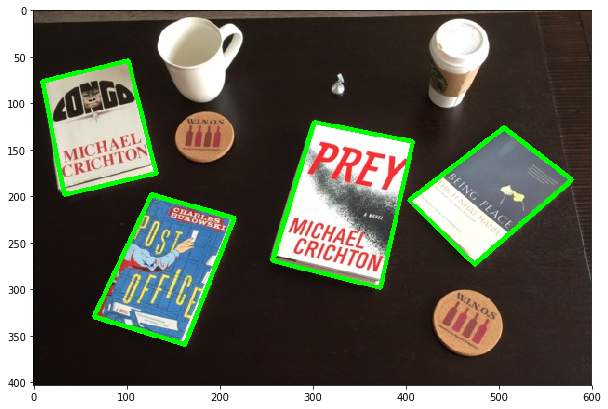

In [16]:
#ทำการหารูปทรงวัตถุที่เป็นสี่เหลี่ยม
_, cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    # หารูปทรงที่ใล้เคียงกัน
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    #ทำการวาดเส้นตามรูปทรง
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

# นับจำนวนหนังสือ
print ("I found {0} books in that image".format(total))
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()